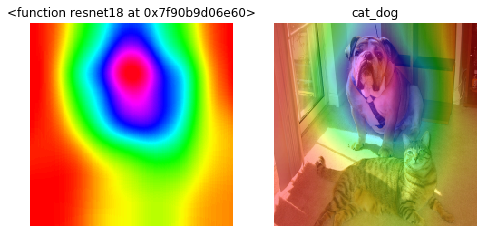

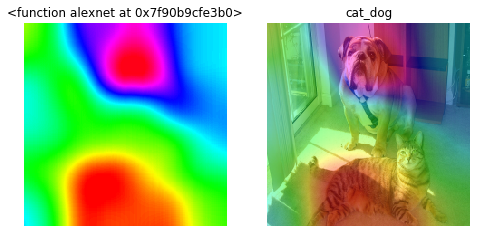

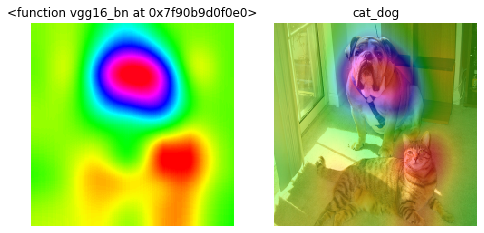

In [1]:
from dlcliche.notebook import *
from dlcliche.utils import *
from src.gradcam import GradCam
from src.misc_functions import *

for target_example in [1]: # range(3):
    for model_fn, target_layer in [(models.resnet18, 7), (models.alexnet, 0), (models.vgg16_bn, 0)]:
        # get params
        (original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
            get_example_params(target_example, relative_path='', model_fn=model_fn)
        # grad cam
        grad_cam = GradCam(pretrained_model, target_layer=target_layer)
        # generate cam mask
        cam = grad_cam.generate_cam(prep_img, target_class)
        # visualize images
        cam_img, overlay_img = apply_colormap_on_image(original_image, cam, 'hsv')
        # plot them
        fig, axs = plt.subplots(1, 2, figsize=(8, 4))
        axs[0].imshow(cam_img);      axs[0].axis('off')
        axs[1].imshow(overlay_img); axs[1].axis('off')
        axs[0].set_title(model_fn)
        axs[1].set_title(file_name_to_export)
        plt.show()